# Stock Analysis 

#### basic stock analysis using python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Portfolio of Bank Stocks**

In [2]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

#### List and Dictionary for Convenience

In [3]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [4]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

-----------------------

### Returns Analysis
-----------

**What is the start date and what is the end date for the price history of these stocks? (Note: They all share the same timespan, you just need to figure it out for one stock holding.)**

In [20]:

BAC.index.max()
BAC.index.min()

Timestamp('2016-09-06 00:00:00')

2021-09-03 00:00:00
2016-09-06 00:00:00


**Create a line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio (together on the same plot).**

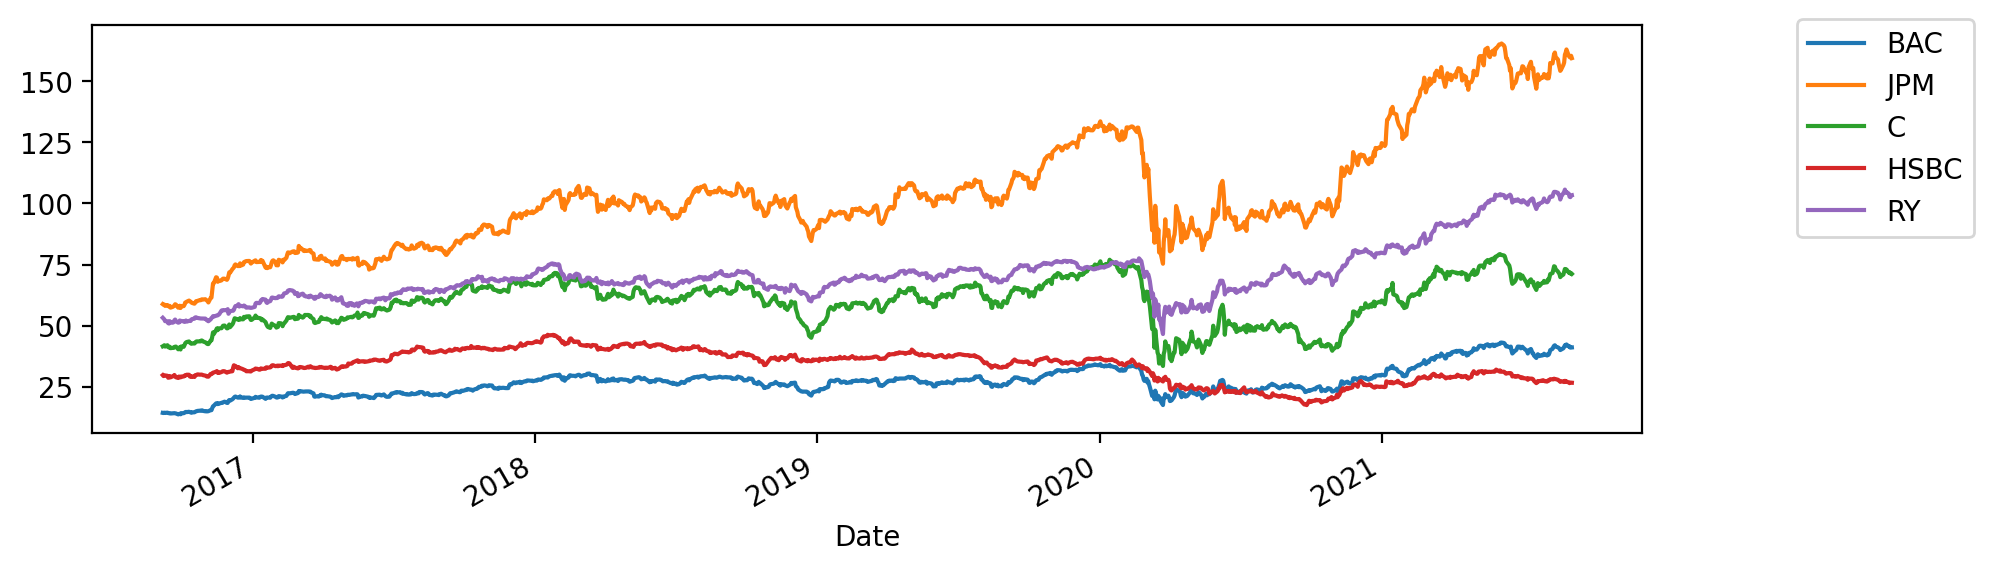

In [29]:
portfolio_list = [BAC,JPM,C,HSBC,RY]


plt.figure(figsize=(10,3), dpi= 200)
BAC['Adj Close'].plot(label = 'BAC')
JPM['Adj Close'].plot(label = 'JPM')
C['Adj Close'].plot(label = 'C')
HSBC['Adj Close'].plot(label = 'HSBC')
RY['Adj Close'].plot(label = 'RY')

plt.legend(loc=(1.1,0.48))



In [40]:
def perc_calc(ticker,start_date,end_date):

    percent_change = 100 *(ticker['Adj Close'][end_date]-ticker['Adj Close'][start_date]) / ticker['Adj Close'][start_date]
    
    percent_change = np.round(percent_change,2)
    
    
    return print(f"'Percent Change: {percent_change}%'")

In [41]:
perc_calc(BAC,'2016-09-06','2021-09-03')

'Percent Change: 187.74%'


**Create a histogram of the daily returns for each stock in the portfolio:**

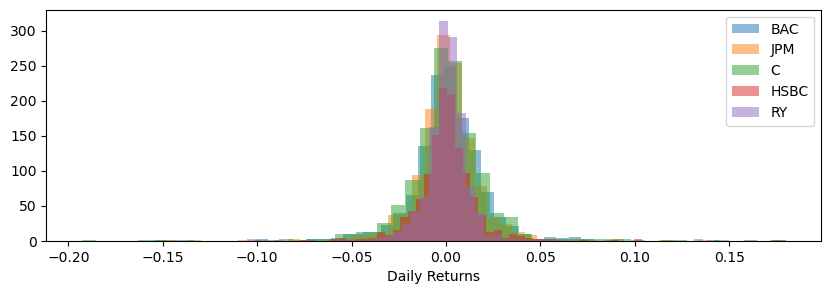

In [116]:
#CODE HERE
#portfolio_list = [BAC,JPM,C,HSBC,RY]
BAC['Daily Returns'] = BAC['Adj Close'].pct_change(1)
JPM['Daily Returns'] = JPM['Adj Close'].pct_change(1)
C['Daily Returns'] = C['Adj Close'].pct_change(1)
HSBC['Daily Returns'] = HSBC['Adj Close'].pct_change(1)
RY['Daily Returns'] = RY['Adj Close'].pct_change(1)

plt.figure(figsize=(10,3))
BAC['Daily Returns'].plot(kind='hist',bins =50, label ='BAC', alpha=0.5)
JPM['Daily Returns'].plot(kind='hist',bins =50, label ='JPM', alpha=0.5)
C['Daily Returns'].plot(kind='hist',bins =50, label ='C', alpha=0.5)
HSBC['Daily Returns'].plot(kind='hist',bins =50, label ='HSBC', alpha=0.5)
RY['Daily Returns'].plot(kind='hist',bins =50, label ='RY', alpha=0.5)

plt.xlabel('Daily Returns')
plt.ylabel('')

plt.legend()

*If you had invested \\$10,000 in BAC (approximately 701 shares) at the start of the time series, you would have about $28773 at the end of the time period. Create a plot that shows the value of \\$10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period.**


Text(0, 0.5, 'Dollar Value of BAC Stock')

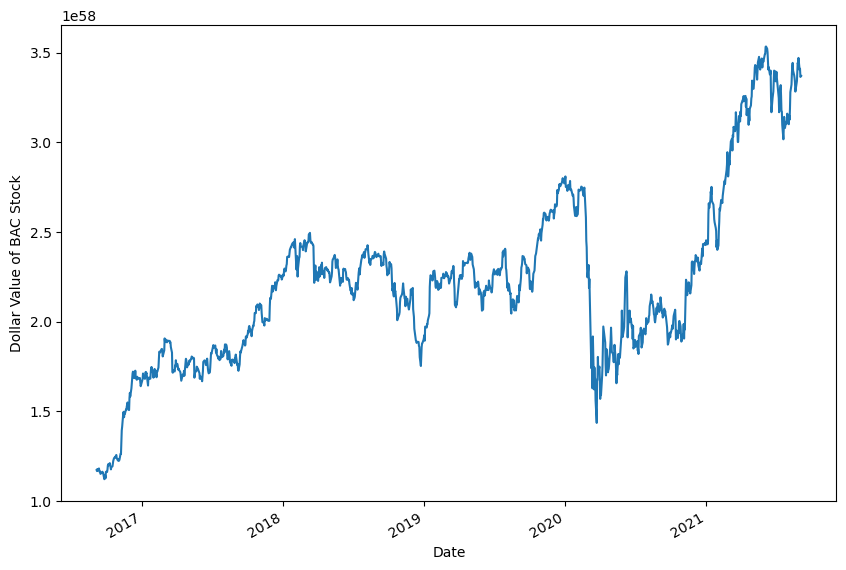

In [73]:
#CODE HERE

plt.figure(figsize=(10,7))

BAC['Adj Close'] = BAC['Adj Close'] * 701
BAC['Adj Close'].plot()
plt.ylabel('Dollar Value of BAC Stock')


**the Annualized Sharpe Ratios for each stock in the portfolio.**

In [87]:

BAC = BAC.dropna()
JPM = JPM.dropna()
C = C.dropna()
HSBC = HSBC.dropna()
RY = RY.dropna()

portfolio_list = [BAC,JPM,C,HSBC,RY]

def compute_sharpe_ratio(df,risk_free_rates=0):
    mean_return = df['Daily Returns'].mean()
    std = df['Daily Returns'].std()
    
    sharpe_ratio = (mean_return - risk_free_rates) / std
    return (252**0.5) * sharpe_ratio

In [89]:
for ticker, df in portfolio_dict.items():
     print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783096
JPM Annualized Sharpe Ratio is: 0.8165069200136568
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


------------------
### Volume Analysis 
-------------

**Create a plot showing the daily volume of stock traded over the time period of 5 years.**

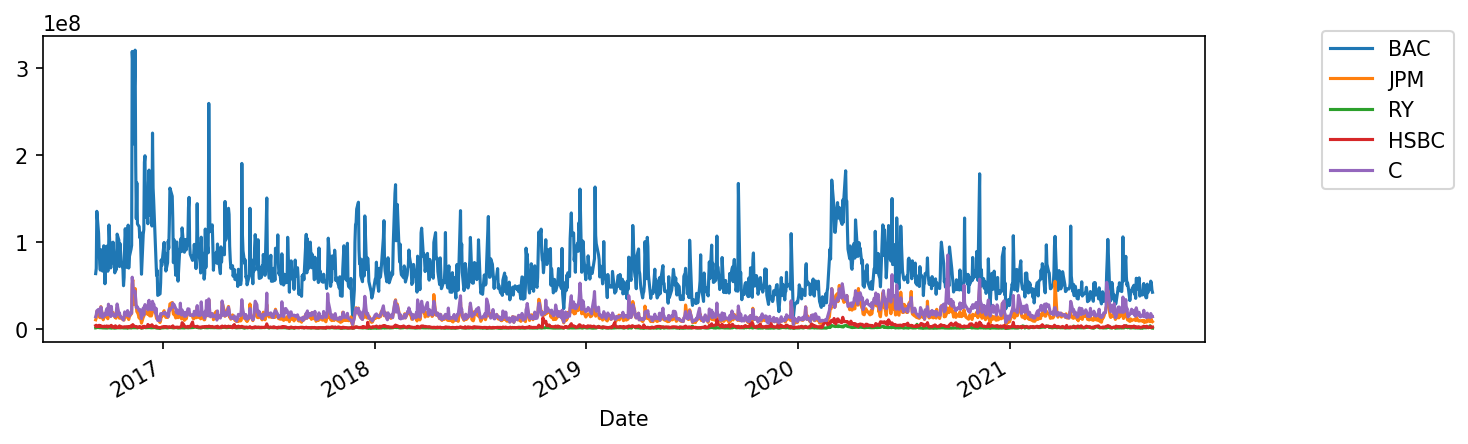

In [110]:

fig,ax = plt.subplots(dpi=150,figsize=(10,3))
BAC['Volume'].plot(ax=ax,label='BAC')
JPM['Volume'].plot(ax=ax,label='JPM')
RY['Volume'].plot(ax=ax,label='RY')
HSBC['Volume'].plot(ax=ax,label='HSBC')
C['Volume'].plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

**Now create a similar plot as the previous one, but it should reflect the total dollar amount, meaning you will need to take into account the price on each day the volume was traded. Feel free to use Adj Close price as the consensus price for a given day.**

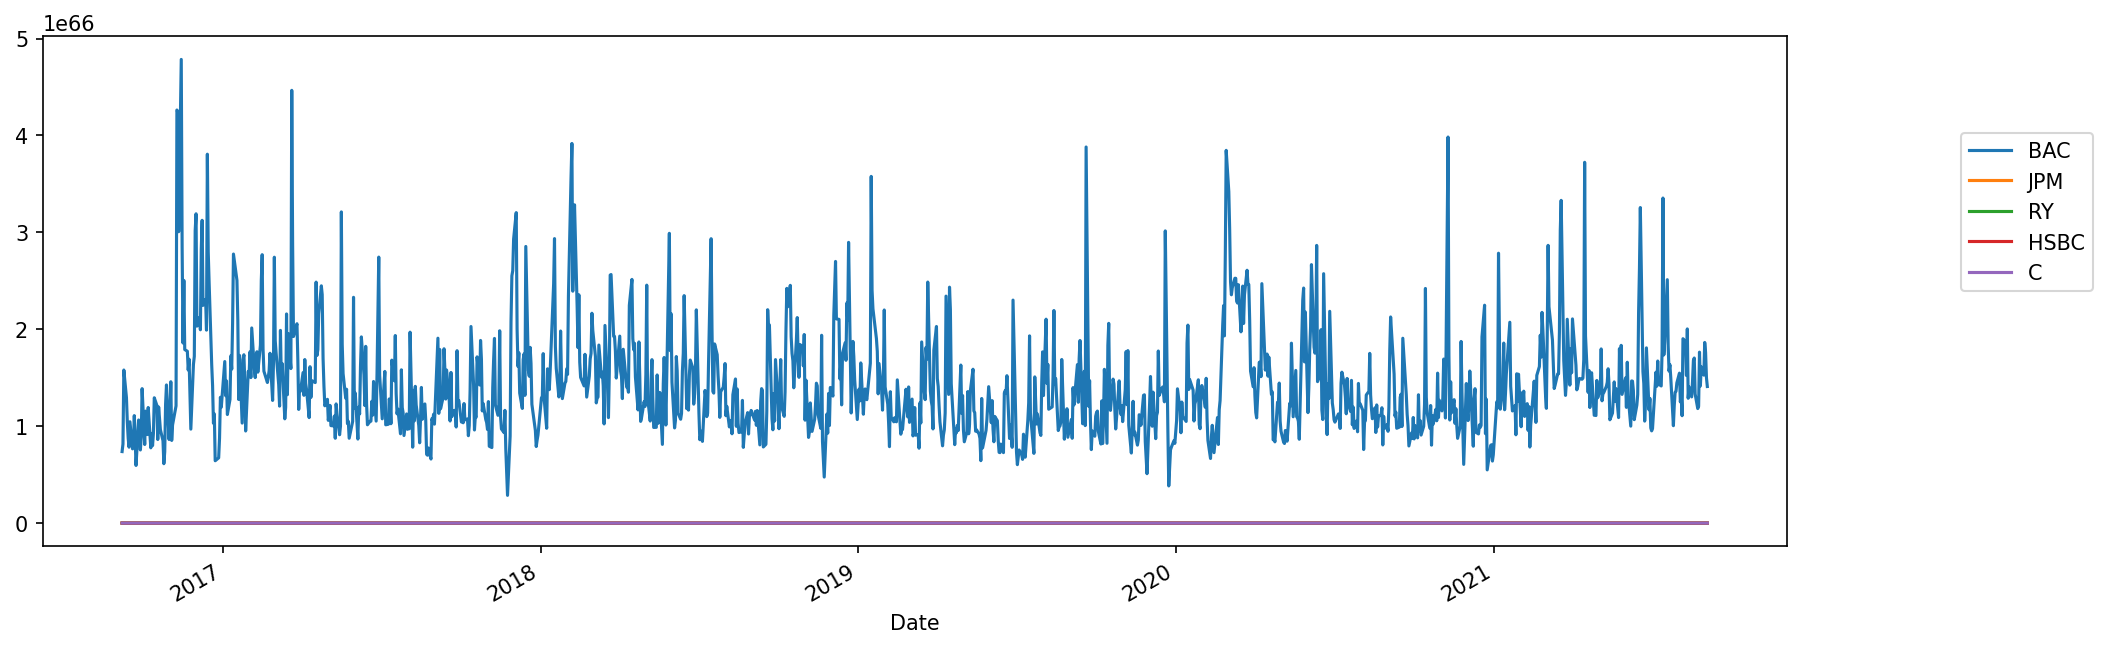

In [111]:

fig,ax = plt.subplots(dpi=150,figsize=(15 ,5))
(BAC['Volume']*BAC['Adj Close']).plot(ax=ax,label='BAC')
(JPM['Volume']*JPM['Adj Close']).plot(ax=ax,label='JPM')
(RY['Volume']*RY['Adj Close']).plot(ax=ax,label='RY')
(HSBC['Volume']*HSBC['Adj Close']).plot(ax=ax,label='HSBC')
(C['Volume']*C['Adj Close']).plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

**Based on your plot above, which stock had the highest dollar value amount traded of their stock on a single day and what date was this? Did anything significant happen aroudn this time period for that company?**

In [114]:
# CODE HERE
(JPM['Volume'] * JPM['Adj Close']).max()

8345011203.784801

In [115]:
(JPM['Volume'] * JPM['Adj Close']).idxmax()

Timestamp('2021-03-19 00:00:00')

--------
### Part Three: Technical Analysis
----

**Using only BAC stock, create a plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.**

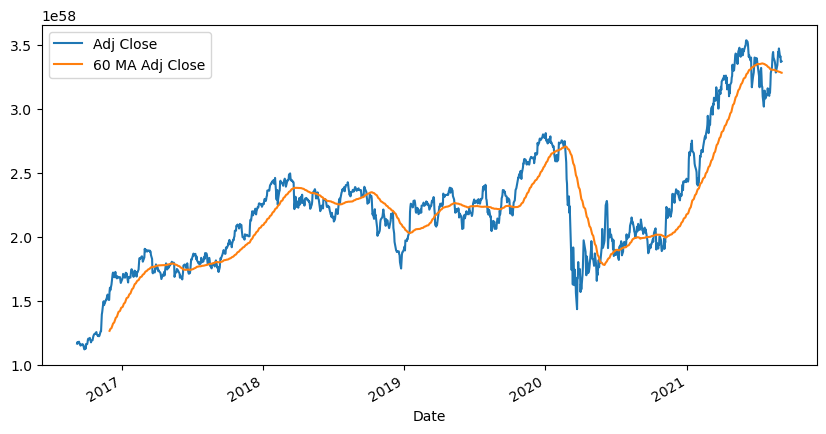

In [123]:
# CODE HERE

plt.figure(figsize=(10,5))

BAC['Adj Close'].plot(label = 'Adj Close')
BAC['Adj Close'].rolling(window=60).mean().plot(label = '60 MA Adj Close')

plt.legend()

**Creating Bollinger Bands.**

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.


In [129]:
plt.figure(figsize=(10,3))

BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()

BAC['BOL_UPPER'] = BAC['MA'] + 2*BAC['STD']
BAC['BOL_LOWER'] = BAC['MA'] - 2*BAC['STD']

BAC[['Adj Close', 'BOL_UPPER','BOL_LOWER']]

<Figure size 1000x300 with 0 Axes>

<AxesSubplot:xlabel='Date'>

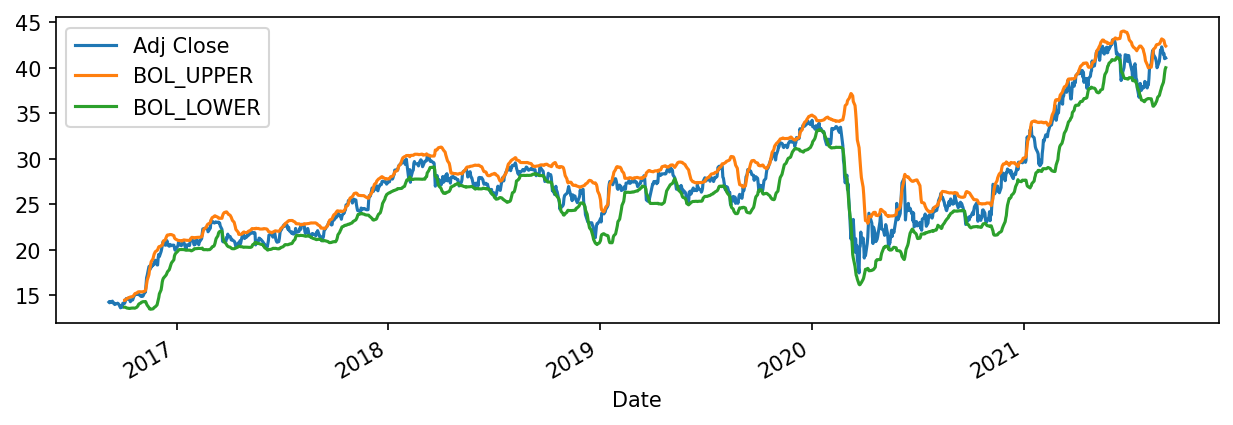

-----